# Laboratorio 2 - Clasificacion de rotulos de trafico utilizando CNN Le-Net
Andrés de la Roca  
Jun Woo Lee

In [204]:
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


## Preparacion de datos

In [205]:
dir_datos = './Datos_Rotulos_Trafico'

In [206]:
os.listdir(dir_datos)

['entrenamiento.p', 'prueba.p', 'validacion.p']

In [207]:
train_route = dir_datos + '/entrenamiento.p'
test_route = dir_datos + '/prueba.p'
validation_route = dir_datos + '/validacion.p'

In [208]:
train_data = pd.read_pickle(train_route)
test_data = pd.read_pickle(test_route)
validation_data = pd.read_pickle(validation_route)

In [209]:
train_images = train_data['features']
labels = train_data['labels']
# test_features = test_data['features']
# validation_features = validation_data['features']

In [210]:
print(train_images.shape)
print(labels.shape)
# print(test_features.shape)
# print(validation_features.shape)

(34799, 32, 32, 3)
(34799,)


In [211]:
from sklearn.model_selection import train_test_split

train_images = train_images.astype(np.float32) / 255.0

# Creacion de variables de entrenamiento, validacion y testeo. Contando imagenes y etiquetas
train_features, test_features, train_labels, test_labels = train_test_split(train_images, labels, test_size=0.2, random_state=42)
train_feautres, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)


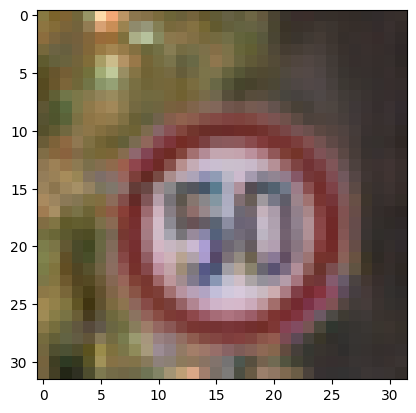

In [212]:
plt.imshow(train_features[0])


### Generacion de imagenes al azar

In [213]:
# forma_imagen = (32, 32, 3)

# from keras.preprocessing.image import ImageDataGenerator

# gen_imagen = ImageDataGenerator(rotation_range = 0, # rotar la imagen 0 grados
#                                width_shift_range = 0.10, # Desplazar el ancho de la imagen por un max de 5%
#                                height_shift_range = 0.10, # Desplazar la altura de la imagen por un max de 5%
#                                #rescale = 1 / 255, # Normalizar la imagen, en este caso ya están normalizadas
#                                shear_range = 0.1, # Shear quiere decir cortar parte de la imagen (max 10%)
#                                zoom_range = 0.1, # Zoom por 10% max
#                                horizontal_flip = False, # voltear la imagen sobre el eje horizontal
#                                fill_mode = 'nearest' # Llenar los pixels faltantes con el valor existente más cercano
#                               )

In [214]:
# def Generator(File_address, Batch_Size):
#     while True:
#       pickle_data = []
#       with (open("myfile", "rb")) as openfile: #Read pickle file. this is a sample. you can use your way to read the pickle file.
#           while True:
#               pickle_data.append(pickle.load(File_address))
      
#       for B in range(0, len(pickle_data), Batch_Size):
#           X = pickle_data[B:B+Batch_Size]
#           Y = Labels[B:B+Batch_Size] #Define your labels
#           yield X, Y #Returning data for training.

In [215]:
# train_gen = Generator(train_route, 50000)
# test_gen = Generator(test_route, 50000)
# validation_gen = Generator(validation_route, 50000)

## Creacion Modelo

In [216]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [217]:
modelo = Sequential()

modelo.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32,32,3)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Conv2D(16, (5, 5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Flatten())
modelo.add(Dense(120, activation='relu'))
modelo.add(Dense(84, activation='relu'))
modelo.add(Dense(43, activation='softmax')) # Traffic sign classes = 43

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

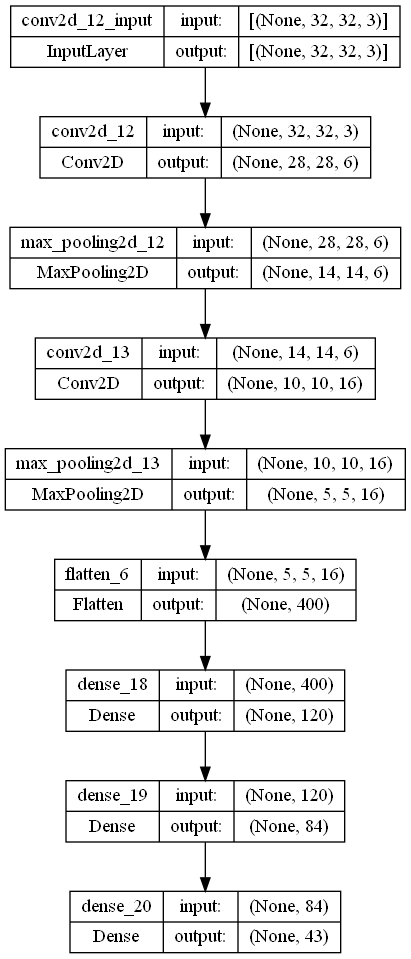

In [218]:
from keras.utils import plot_model
plot_model(modelo, to_file='model.png', show_shapes=True, show_layer_names=True)

In [219]:
from keras.callbacks import EarlyStopping

deteccion_temprana = EarlyStopping(monitor='val_loss', patience=2)

## Entrenamiento de Modelo

In [220]:
import warnings
warnings.filterwarnings('ignore')

In [221]:
from keras.models import load_model
modelo.save('detector_de_senales.h5') #Guardamos el modelo